> # Data and Imports

In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_abun = {}
for i in range(25):
    data_abun[f'df{i}'] = pd.read_csv(f'~/git_env/research/oshea/trident_modifications/testing_mods/SolAb/test_sal/abundance_test3/data/data_row{i}_.csv', delim_whitespace=True)

In [3]:
data_solab = {}
for i in range(25):
    data_solab[f'df{i}'] = pd.read_csv(f'~/git_env/research/oshea/trident_modifications/testing_mods/SolAb/test_sal/abundance_test4_solab/data/data_row{i}_.csv', delim_whitespace=True)

> # Functions

In [4]:
def what_ions(df, ion_list, ray_index):
    """
    determines what ions are returned in handy dandy dataframe from salsa 
    
    :ion_list: list of ions initially passed to salsa
    
    :ray: lightray index from salsa dataframe
    """
    names = [i for i in ion_list if i in df['name'].tolist() and i in ray_index['name'].tolist()]

    return names

In [5]:
def pick_intervals(file_dictionary, lightray):
    
    master_df = pd.DataFrame()
    
    for df in file_dictionary:
        obj = file_dictionary[df]
        master_df = master_df.append(obj[obj['lightray_index'] == lightray])
        
    master_df.reset_index(inplace=True)
    
    index_list = []
    
    for index in range(len(master_df)):
        
        magic_start = master_df['interval_start'][index]
        magic_end = master_df['interval_end'][index]

        if index == 0:
            index_list.append([magic_start, magic_end])
        elif [magic_start, magic_end] in index_list:
            pass
        else:
            
            count = 0

            for x in range(len(index_list)):

                if [magic_start, magic_end] in index_list:
                    pass
                
                elif index_list[x][0] == magic_start:
                    if magic_end > index_list[x][1]:
                        index_list[x][1] = magic_end
                    else:
                        count += 1

                elif index_list[x][1] == magic_end:
                    if magic_start < index_list[x][0]:
                        index_list[x][0] = magic_start
                    else:
                        count += 1
  
            if [magic_start, magic_end] not in index_list and count == 0:
                index_list.append([magic_start, magic_end])
            
    return master_df, index_list

In [6]:
# def hist_setup(absorber_df, thing_we_care_about='col_dens', xleft=13.0, xright=13.6, lims=False):
def hist_setup(absorber_df):
    
    dic = {}
    for index in range(len(absorber_df)):
        if index == 0:
            dic[f"{absorber_df['name'][index]}"] = []
        else:
            if absorber_df['name'][index] == absorber_df['name'][index-1]:
                pass
            else:
                dic[f"{absorber_df['name'][index]}"] = []
                
#     for ion in dic:
#         for index in range(len(absorber_df)):
#             if absorber_df['name'][index] == ion:
#                 dic[ion].append(absorber_df[thing_we_care_about][index])
#         plt.hist(dic[ion], label=ion)
#         plt.title(f"{str(absorber_df), ion}")
#         if lims is not False:
#             plt.xlim(xleft, xright)
#     plt.legend()
    
    return dic

In [24]:
def make_plot_series(master_dic, series='col_dens', xleft=13.0, xright=13.6, lims=False):
    
    """
    assumes lengths of index lists for each set of data are the same
    """
    
#     rows = len(master_dic[list(master_dic.keys())[0]]['index_list'])
#     columns = len(master_dic.keys())
    
    rows = 13
    columns = 2
    
    for dnum in range(columns):
        index_list = master_dic[list(master_dic.keys())[dnum]]['index_list']
        master_df = master_dic[list(master_dic.keys())[dnum]]['master_df']
        for interval in range(len(index_list)):
            df = master_df[(master_df['interval_start'] >= index_list[interval][0]) & (master_df['interval_end'] <= index_list[interval][1])]
            name_list=[]
            for name in df['name']:
                name_list.append(name)
            print(f"interval: {index_list[interval]}, {collections.Counter(name_list)}")
            print(f"df length = {len(df)}")
            df.reset_index(inplace=True)
            fig, ax = plt.subplots(rows, columns)
            dic = hist_setup(df)
            
            for ion in dic:
                for index in range(len(df)):
                    if df['name'][index] == ion:
                        dic[ion].append(df[series][index])
                ax[interval, dnum].hist(dic[ion], label=ion)
                ax[interval, dnum].set_title(f"{str(df), ion}")
                ax[interval, dnum].legend()
                if lims is not False:
                    ax[interval, dnum].set_xlim(xleft, xright)
#             plt.legend()
    
            
            plt.show()
    

> # Work

In [13]:
len(data[list(data.keys())[0]]['index_list'])

13

In [8]:
lray_index = 62

df1_abun = data_abun['df0']
df1_solab = data_solab['df0']

names_abun = what_ions(df = df1_abun, ion_list = ['Ne VIII', 'Mg X', 'O VI', 'S IV', 'Si III', 'C II', 'N I'], ray_index = df1_abun[df1_abun['lightray_index'] == lray_index])
names_solab = what_ions(df = df1_solab, ion_list = ['Ne VIII', 'Mg X', 'O VI', 'S IV', 'Si III', 'C II', 'N I'], ray_index = df1_solab[df1_solab['lightray_index'] == lray_index])

master_df_abun, index_list_abun = pick_intervals(data_abun, lray_index)
master_df_solab, index_list_solab = pick_intervals(data_solab, lray_index)

print(("INDEX LISTS ARE THE SAME WE GUCCI") if index_list_abun==index_list_solab else ("INDEX LISTS ARE **NOT** THE SAME WE ARE **NOT** GUCCI"))
print(f"index list, abundance: {index_list_abun}")
print(f"index list, solab: {index_list_solab}")

INDEX LISTS ARE THE SAME WE GUCCI
index list, abundance: [[102, 132.0], [178, 215.0], [373, 384.0], [351, 365.0], [215, 219.0], [232, 357.0], [258, 283.0], [284, 357.0], [357, 365.0], [234, 264.0], [266, 270.0], [273, 276.0], [277, 279.0]]
index list, solab: [[102, 132.0], [178, 215.0], [373, 384.0], [351, 365.0], [215, 219.0], [232, 357.0], [258, 283.0], [284, 357.0], [357, 365.0], [234, 264.0], [266, 270.0], [273, 276.0], [277, 279.0]]


> # Analysis

interval: [102, 132.0], Counter({'O VI': 25})
df length = 25


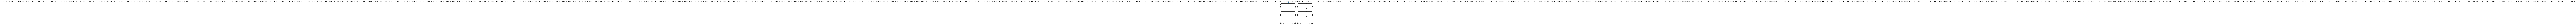

interval: [178, 215.0], Counter({'O VI': 25})
df length = 25


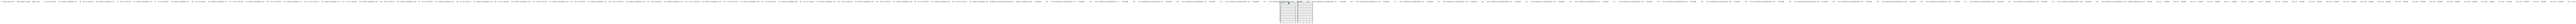

interval: [373, 384.0], Counter({'O VI': 25})
df length = 25


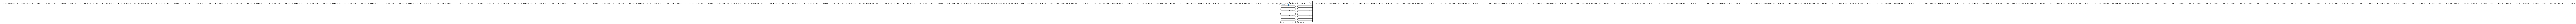

interval: [351, 365.0], Counter({'C II': 50, 'S IV': 25, 'Si III': 25})
df length = 100


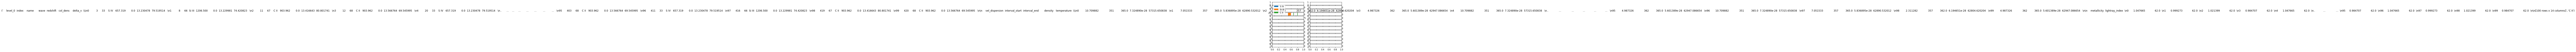

interval: [215, 219.0], Counter({'Si III': 25, 'C II': 25})
df length = 50


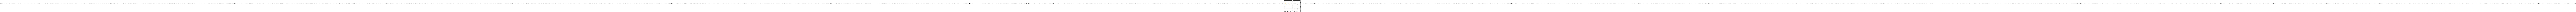

interval: [232, 357.0], Counter({'N I': 100, 'Si III': 75, 'C II': 25})
df length = 200


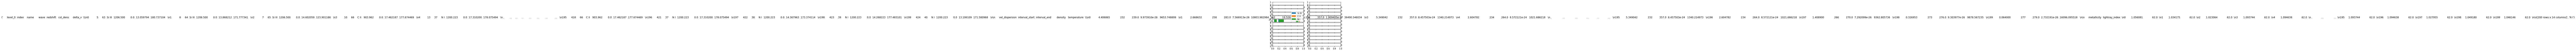

interval: [258, 283.0], Counter({'N I': 75, 'Si III': 25})
df length = 100


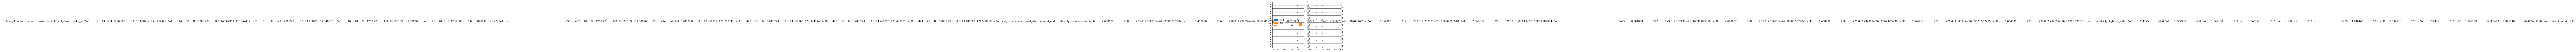

interval: [284, 357.0], Counter({'Si III': 25})
df length = 25


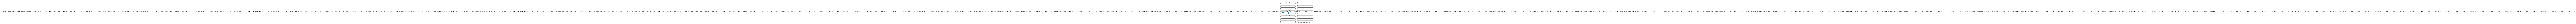

interval: [357, 365.0], Counter({'C II': 50, 'Si III': 25})
df length = 75


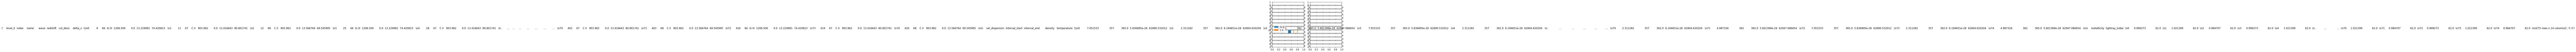

interval: [234, 264.0], Counter({'N I': 25})
df length = 25


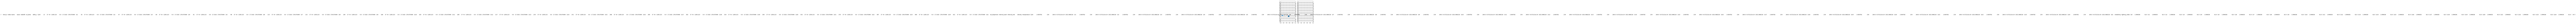

interval: [266, 270.0], Counter({'N I': 25})
df length = 25


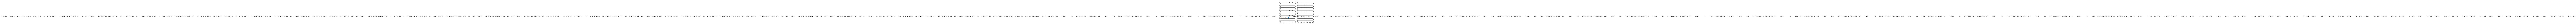

interval: [273, 276.0], Counter({'N I': 25})
df length = 25


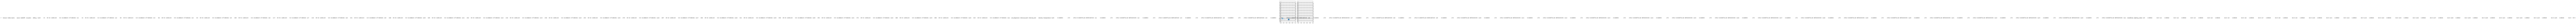

interval: [277, 279.0], Counter({'N I': 25})
df length = 25


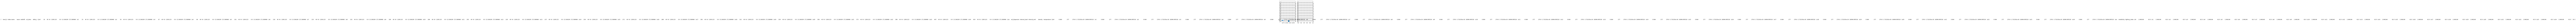

interval: [102, 132.0], Counter({'O VI': 25})
df length = 25


KeyboardInterrupt: 

In [25]:
data = dict(abun = dict(master_df = master_df_abun, index_list = index_list_abun), solab = dict(master_df = master_df_solab, index_list = index_list_solab))

make_plot_series(data)

> # Backup

In [27]:
def hist_plot(absorber_df, thing_we_care_about, xleft=13.0, xright=13.6, lims=False):
    
    dic = {}
    for index in range(len(absorber_df)):
        if index == 0:
            dic[f"{absorber_df['name'][index]}"] = []
        else:
            if absorber_df['name'][index] == absorber_df['name'][index-1]:
                pass
            else:
                dic[f"{absorber_df['name'][index]}"] = []
                
    for ion in dic:
        for index in range(len(absorber_df)):
            if absorber_df['name'][index] == ion:
                dic[ion].append(absorber_df[thing_we_care_about][index])
#         print(dic[ion])
        plt.hist(dic[ion], label=ion)
        if lims is not False:
            plt.xlim(xleft, xright)
    plt.legend()
    
    return dic



def make_plot(index_list, master_df):
    for interval in index_list:
        df = master_df[(master_df['interval_start'] >= interval[0]) & (master_df['interval_end'] <= interval[1])]
        name_list=[]
        for name in df['name']:
            name_list.append(name)
        print(f"interval: {interval}, {collections.Counter(name_list)}")
        print(f"df length = {len(df)}")
        df.reset_index(inplace=True)
        plt.figure()
        hist_plot(df, 'col_dens')
        plt.show()


interval: [102, 132.0], Counter({'O VI': 25})
df length = 25


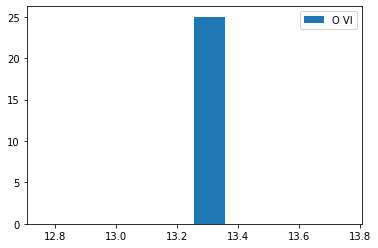

interval: [178, 215.0], Counter({'O VI': 25})
df length = 25


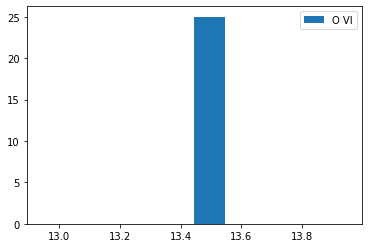

interval: [373, 384.0], Counter({'O VI': 25})
df length = 25


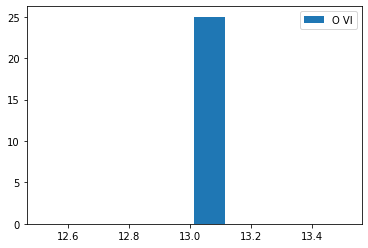

interval: [351, 365.0], Counter({'C II': 50, 'S IV': 25, 'Si III': 25})
df length = 100


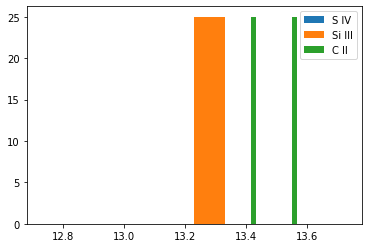

interval: [215, 219.0], Counter({'Si III': 25, 'C II': 25})
df length = 50


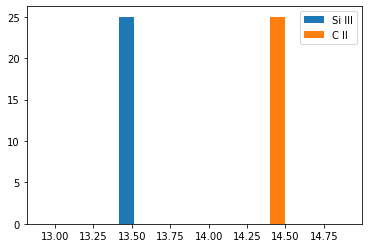

interval: [232, 357.0], Counter({'N I': 100, 'Si III': 75, 'C II': 25})
df length = 200


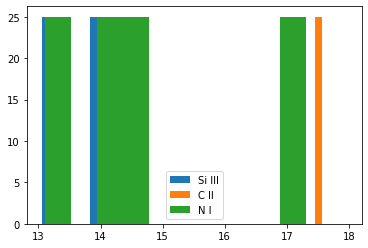

interval: [258, 283.0], Counter({'N I': 75, 'Si III': 25})
df length = 100


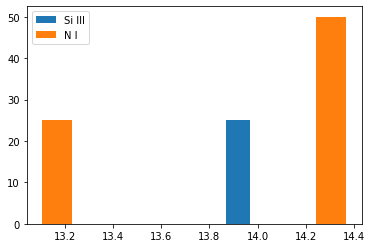

interval: [284, 357.0], Counter({'Si III': 25})
df length = 25


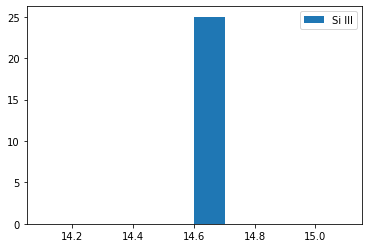

interval: [357, 365.0], Counter({'C II': 50, 'Si III': 25})
df length = 75


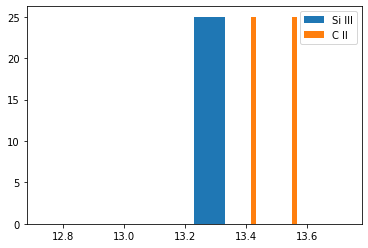

interval: [234, 264.0], Counter({'N I': 25})
df length = 25


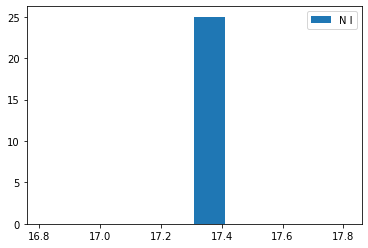

interval: [266, 270.0], Counter({'N I': 25})
df length = 25


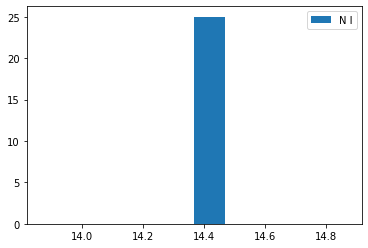

interval: [273, 276.0], Counter({'N I': 25})
df length = 25


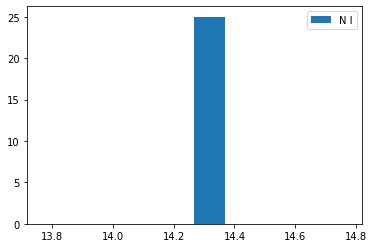

interval: [277, 279.0], Counter({'N I': 25})
df length = 25


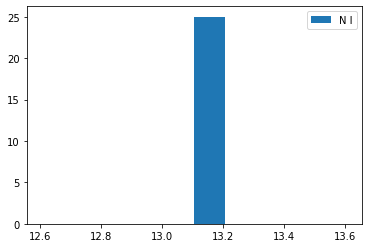

In [28]:
make_plot(index_list_abun, master_df_abun)

interval: [102, 132.0], Counter({'O VI': 25})
df length = 25


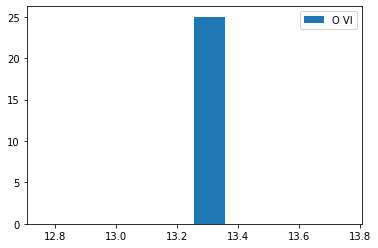

interval: [178, 215.0], Counter({'O VI': 25})
df length = 25


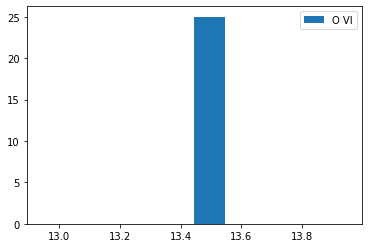

interval: [373, 384.0], Counter({'O VI': 25})
df length = 25


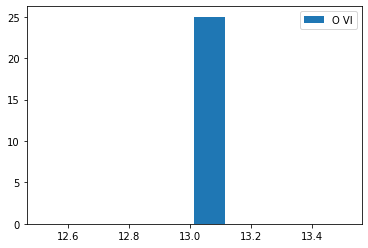

interval: [351, 365.0], Counter({'C II': 50, 'S IV': 25, 'Si III': 25})
df length = 100


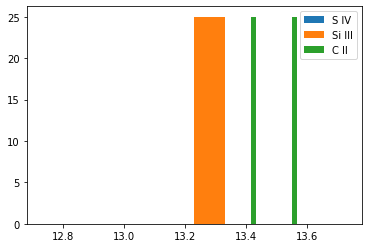

interval: [215, 219.0], Counter({'Si III': 25, 'C II': 25})
df length = 50


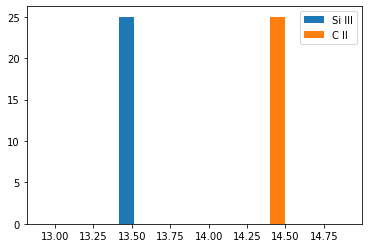

interval: [232, 357.0], Counter({'N I': 100, 'Si III': 75, 'C II': 25})
df length = 200


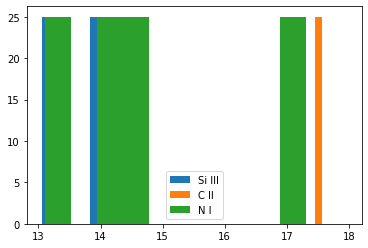

interval: [258, 283.0], Counter({'N I': 75, 'Si III': 25})
df length = 100


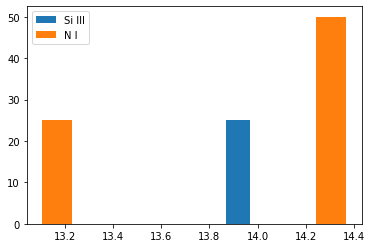

interval: [284, 357.0], Counter({'Si III': 25})
df length = 25


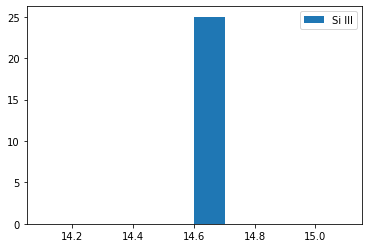

interval: [357, 365.0], Counter({'C II': 50, 'Si III': 25})
df length = 75


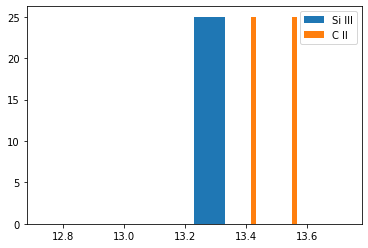

interval: [234, 264.0], Counter({'N I': 25})
df length = 25


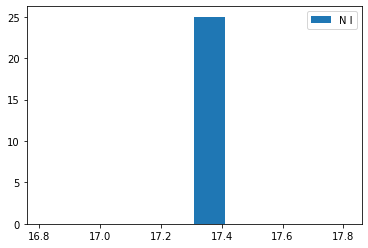

interval: [266, 270.0], Counter({'N I': 25})
df length = 25


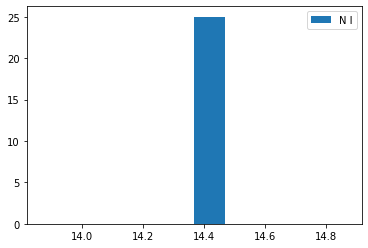

interval: [273, 276.0], Counter({'N I': 25})
df length = 25


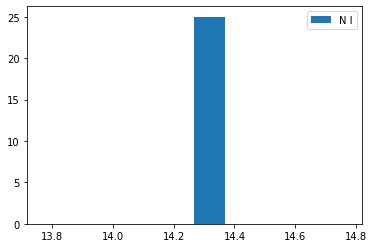

interval: [277, 279.0], Counter({'N I': 25})
df length = 25


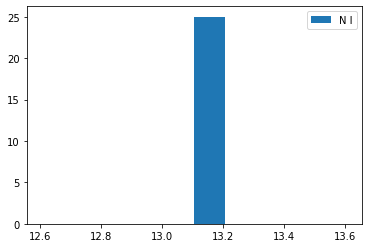

In [29]:
make_plot(index_list_solab, master_df_solab)